In [1]:
from pynsn import factory

In [2]:
da_specification = factory.DotArraySpecs(
    target_area_radius=200,
    item_diameter_mean=13,
    item_diameter_range=(10, 25),
    item_diameter_std=4,
    minimum_gap=2)

In [3]:
# Generate random dot array with 55 dots
stimulus = factory.random_array(da_specification, 55)

In [4]:
# dot array bis asically a list of positions and diameters that describes the pattern
print(stimulus.json())

{"xy": [[-83.46239924582571, 42.43596982703838], [-84.74246569937658, -38.96487214979007], [50.990513280698224, -128.08637243982633], [-116.76439024365921, -153.25205091590243], [-26.883785357101033, 71.70082940638264], [-182.33241408433005, 7.016753027152021], [-55.65854375233502, 83.14541466893519], [-162.08370023119994, 84.71564049105001], [-121.78380076150748, 10.451321334869846], [-98.51279171118681, 131.48469550227753], [-6.382297265594559, 119.15059069264282], [-5.685951204890131, -133.02709435318883], [-20.61589708184229, -69.73246700174721], [69.37547900159979, 43.74172143487618], [47.6075132161958, -3.027007109218033], [87.36755146716126, 89.21942808487637], [48.12245420318342, -177.03019151678734], [-36.41668776943288, 153.34919632770567], [-90.66971470682117, 81.08078187860247], [17.348852118741974, -143.42179137345533], [169.6298732448608, 5.590519922624452], [84.32383430057502, 121.12330056270639], [138.6970327719851, -48.86319296654827], [166.2715876841313, 28.8057032713

# Make pictures

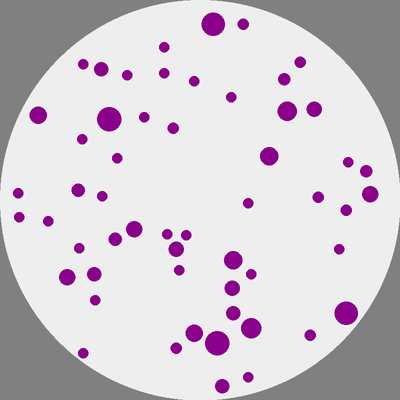

In [5]:
from pynsn import ImageColours
from pynsn.image import svg, pil

# To make picture (pillow), first define some colour features
my_colours = ImageColours(target_area="#EEEEEE", background="gray",
                         item_colour="darkmagenta") # show named colours see Colour.NAMED_COLOURS
pil.create(stimulus, colours=my_colours)

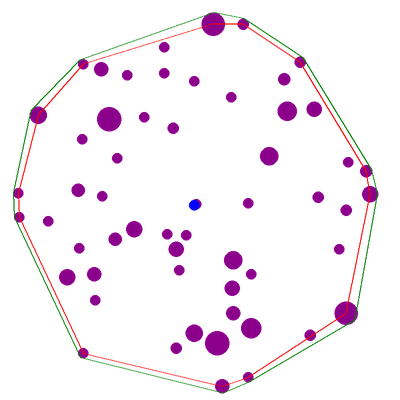

In [6]:
# example: to plot field area and center of mass, just define the repective colours and plot
my_colours2 = ImageColours(target_area=None,
                          field_area="red",
                          field_area_outer="green",
                          center_of_mass="purple",
                          center_of_outer_positions="blue",
                          background=None,
                          item_colour="darkmagenta")
pil.create(stimulus, colours=my_colours2)

In [7]:
# to save the stimulus as vector graphic, generate a SVG stimuli
svg_stimulus = svg.create(stimulus, colours=my_colours, filename="demo.svg")
svg_stimulus.save()

# Visual Features

In [8]:
# show properties for the current stimulus
print(stimulus)

- Hash: 7e8c40d9a048b7ae8a02fdcfc0a46700
  Numerosity..........        55.00
  Total surface area..      7991.43
  Mean item surface area       145.30
  Mean item diameter..        13.00
  Total perimeter.....        40.84
  Mean item perimeter.      2246.24
  Field area..........     95111.27
  Sparsity............      1729.30
  Coverage............         0.08
  Log Size............        20.15
  Log Spacing.........        27.29



In [11]:
from pynsn import match
# change surface array
match.total_surface_area(stimulus, 23000)
print(stimulus)

- Hash: 7f5296a62d779c72759fb2f0270113a1
  Numerosity..........        55.00
  Total surface area..     23000.00
  Mean item surface area       418.18
  Mean item diameter..        22.05
  Total perimeter.....        69.29
  Mean item perimeter.      3810.73
  Field area..........     95111.27
  Sparsity............      1729.30
  Coverage............         0.24
  Log Size............        23.20
  Log Spacing.........        27.29



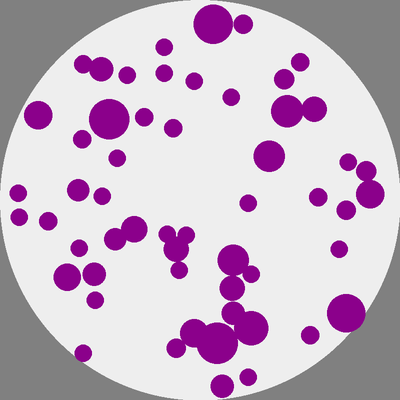

In [12]:
pil.create(stimulus, colours=my_colours)

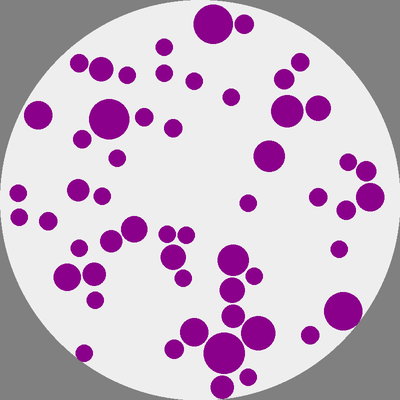

In [13]:
# realign dot arry to avoid overlap
stimulus.realign()
pil.create(stimulus, colours=my_colours)

In [ ]:
# change log_size 
stimulus.match.log_size(18)
print(stimulus)

In [ ]:
pil.create(stimulus, colours=my_colours)

In [ ]:
# change spacing parameter (iterative procedure)
stimulus.match.log_spacing(23,  precision=0.01)
print(stimulus)

In [ ]:
# as you see the surface area and sparsity (1/density) is smaller
pil.create(stimulus, colours=ImageColours(field_area_outer="red"))

# 2 matched stimuli

In [ ]:
my_colours = ImageColours(target_area="#EEEEEE", item_colour="lime") 

da_specification = factory.DotArraySpecs(
    target_area_radius=200,
    item_diameter_mean=20,
    item_diameter_range=(10, 25),
    item_diameter_std=4,
    minimum_gap=2)

stim1 = factory.random_array(da_specification, 30)
stim2 = factory.random_array(da_specification, 30)

print(dir(stim2))

In [ ]:
stim2